In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv('customer_segmentation.csv',encoding='cp932')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
dataset['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [9]:
dataset['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

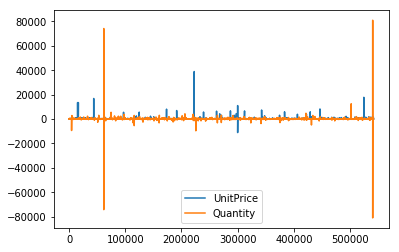

In [12]:
dataset[['UnitPrice','Quantity']].plot()

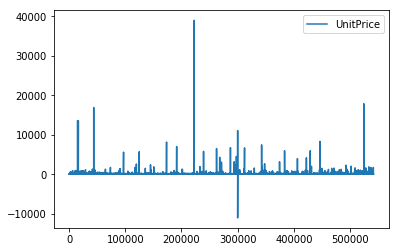

In [13]:
dataset[['UnitPrice']].plot()

In [24]:
q=dataset[dataset['UnitPrice']<0]
q

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [30]:
dataset=dataset.drop(299983)
dataset=dataset.drop(299984)


In [31]:
q=dataset[dataset['UnitPrice']<0]
q

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [33]:
plt.figsize(16,8)
#plt.plot(UnitPrice,Quantity)
dataset[['UnitPrice','Quantity']].plot()

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

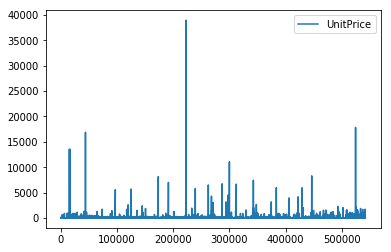

In [34]:
dataset[['UnitPrice']].plot()

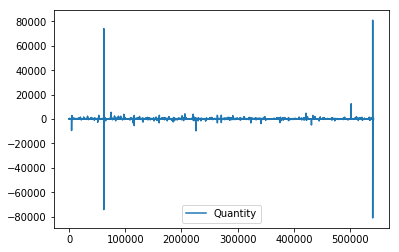

In [35]:
dataset[['Quantity']].plot()

In [37]:
r=dataset[dataset['Quantity']<0]
r.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [38]:
len(r)

10624

In [40]:
dataset.shape

(541907, 8)

In [49]:
dataset.drop(dataset[dataset['Quantity']<0].index,inplace=True)

In [50]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [51]:
dataset[dataset['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


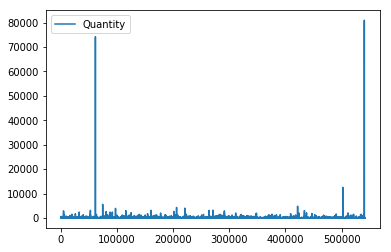

In [52]:
dataset[['Quantity']].plot()

In [59]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0, 1))

In [57]:
x=dataset.iloc[:,[3,5]]
x.head()

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


In [90]:
x_new=sc.fit_transform(x)
x1=pd.DataFrame(x,columns=['Quantity','UnitPrice'])

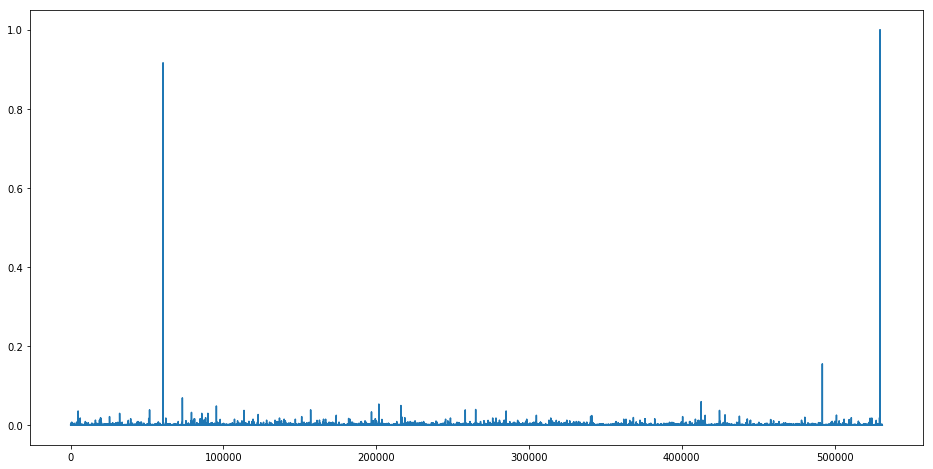

In [67]:
plt.figure(figsize=(16,8))
plt.plot(x1['Quantity'])

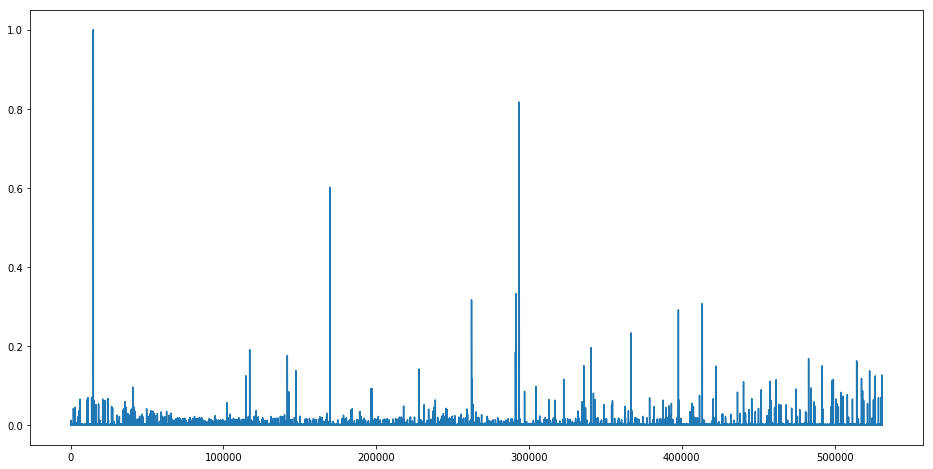

In [84]:
plt.figure(figsize=(16,8))
plt.plot(x1['UnitPrice'])

In [85]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 2 columns):
Quantity     531283 non-null float64
UnitPrice    531283 non-null float64
dtypes: float64(2)
memory usage: 8.1 MB


In [70]:
np.var(x1)

Quantity     0.000004
UnitPrice    0.000007
dtype: float64

In [81]:
from sklearn.cluster import KMeans
model=KMeans('n_clusters=5',"init='k-means++'")

In [91]:
model.fit_transform(x_new)

TypeError: '<' not supported between instances of 'int' and 'str'

In [102]:
x1['UnitPrice'].unique()

array([0.00018831, 0.00025034, 0.00020308, ..., 0.00035152, 0.06891273,
       0.12658801])

In [104]:
pd.to_numeric(x_new['UnitPrice'],errors='coerce')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [97]:
print(p)

[0.00018831 0.00025034 0.00020308 ... 0.00035152 0.06891273 0.12658801]


In [89]:
x1[x1['UnitPrice']=='<']

TypeError: invalid type comparison

In [ ]:
Quantity','UnitPrice